In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# NLTK 
import nltk
from nltk.tokenize import wordpunct_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#nltk.download()
nltk.download('omw-1.4')
nltk.download('stopwords')

# data visual
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# string proccessing
import re
import string


[nltk_data] Downloading package omw-1.4 to /home/raul/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/raul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
pip install re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
Note: you may need to restart the kernel to use updated packages.


In [3]:
## Leer df
path = 'data/youtoxic_english_1000.csv'
df = pd.read_csv(path)
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\r\nDont you reckon them 'black lives matter' ...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: xlabel='IsToxic', ylabel='count'>

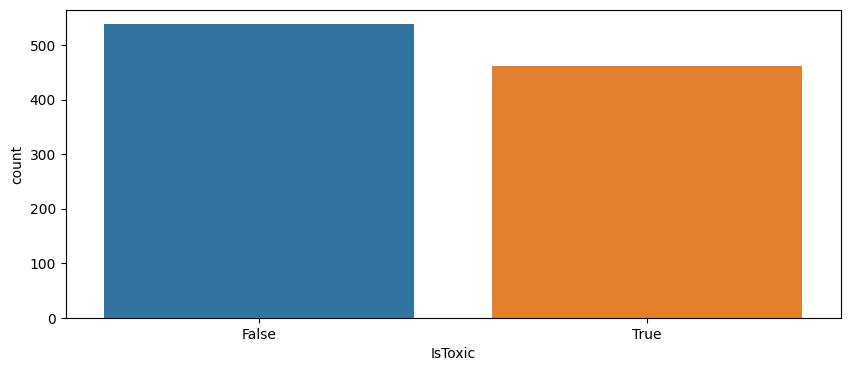

In [4]:
plt.figure(figsize=(10,4))
sns.countplot(x="IsToxic", data=df)

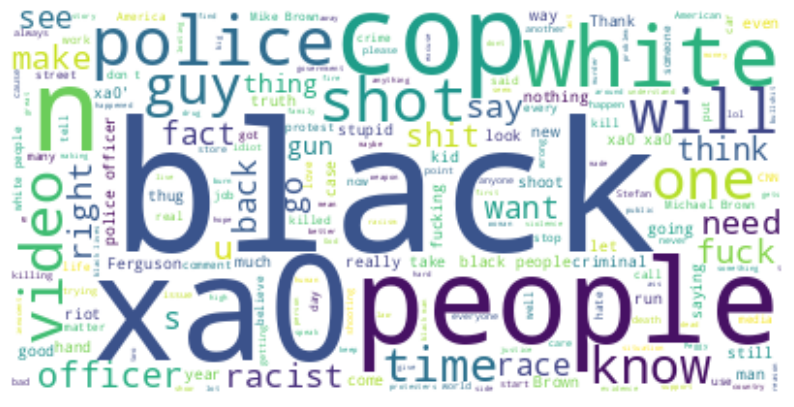

In [5]:
text = df['Text'].values 

wordcloud = WordCloud(background_color="white").generate(str(text))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
stopwords = set(stopwords.words('english')) - set(['i', 'he', 'she', 'you', 'me', 'we', 'us',
                                                   'this', 'them', 'that', 'those', 'her', 'his'])

In [7]:
wnl = WordNetLemmatizer()

In [8]:
def lem_n(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token)
        a.append(lemmetized_word)
    return a

def lem_v(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token, pos='v')
        a.append(lemmetized_word)
    return a

def lem_a(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token,pos='a')
        a.append(lemmetized_word)
    return a

def lem_r(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token, pos='r')
        a.append(lemmetized_word)
    return a

def lem_s(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token,pos='s')
        a.append(lemmetized_word)
    return a

In [9]:
def apply_re(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub('(\\\\u([a-z]|[0-9])+)', ' ', text)
    text = re.sub(r'https|http?:\/\/\S+', '', text)
    return text


In [10]:
def join_words(text):
    return ' '.join(text)

In [11]:
wnl = WordNetLemmatizer()
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df['Text'] = df['Text'].apply(apply_re)
df['Text'] = df['Text'].apply(word_tokenize)
df['Text'] = df['Text'].apply(lem_n)
df['Text'] = df['Text'].apply(lem_v)
df['Text'] = df['Text'].apply(lem_r)
df['Text'] = df['Text'].apply(lem_a)
df['Text'] = df['Text'].apply(lem_s)
df['Text'] = df['Text'].apply(join_words)

In [12]:
df

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If people would take step back make this case ...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement train shoot apprehend They tra...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,Dont you reckon them black life matter banner ...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There large number people like police officer ...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,The Arab dude absolutely right he shoot 6 extr...,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,I remember that send national defence,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats dont represent problem Race bait attitud...,True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,The quote mother Wow that hit hard Very accurate,False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,this video racist,False,False,False,False,False,False,False,False,False,False,False,False


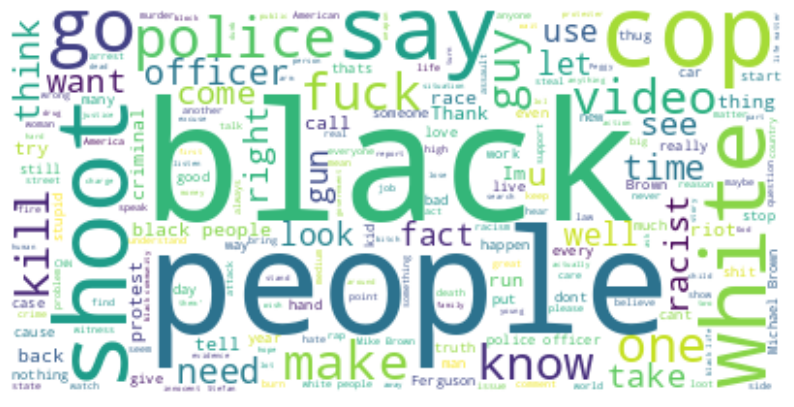

In [13]:
text = df['Text'].values 

wordcloud = WordCloud(background_color="white").generate(str(text))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
#sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [15]:
df = shuffle(df, random_state = 42)
df

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
521,UgjxVU0ok82_bXgCoAEC,9pr1oE34bIM,You call anarchist defend cop shoot unarm civi...,False,False,False,False,False,False,False,False,False,False,False,False
737,Uggma-nkAiK-eXgCoAEC,dG7mZQvaQDk,My mother tell me thing God Bless this woman,False,False,False,False,False,False,False,False,False,False,False,False
740,UggQG0KuU_-llXgCoAEC,dG7mZQvaQDk,Love I saem thing Go Peggy stupid Ya Killing y...,False,False,False,False,False,False,False,False,False,False,False,False
660,Ugy2Wc3ZRDsMcDYmoKF4AaABAg,cT14IbTDW2c,Next time that line car start make burnout smo...,True,True,False,True,False,False,False,False,False,False,False,False
411,Ugigl4XGkNFMMHgCoAEC,9pr1oE34bIM,He Robbing Store Being Big Man If you Play Fir...,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,UgiPerbilaHyd3gCoAEC,04kJtp6pVXI,I think that this indecent unessacerry event o...,False,False,False,False,False,False,False,False,False,False,False,False
270,UggdxGw2fbcT0XgCoAEC,9pr1oE34bIM,you clearly racist shrill canadian vegatable a...,True,True,False,False,False,False,False,False,False,False,False,False
860,Ugx3he2JevffnBpSued4AaABAg,Dt9-byUhPdg,people see herei cant even understand sayingis...,True,False,False,False,False,True,True,False,False,False,False,False
435,UgiQjn-ai72EUXgCoAEC,9pr1oE34bIM,This far base that you cant even call propagan...,True,True,False,True,False,False,False,False,False,False,False,False


In [16]:
vectorizer = CountVectorizer()
tfid = TfidfTransformer()
XGB_model = XGBClassifier(max_depth = 50, min_child_weight = 10, eta = 1, objective = 'binary:logistic', colsample_bytree=0.6, subsample=0.7, 
 n_estimators=300, eval_metric='auc', early_stopping_rounds=10)
#Log_reg = LogisticRegression(verbose=True)
CBT_model = CatBoostClassifier(iterations=1000, learning_rate=0.01, loss_function= 'Logloss', eval_metric='AUC',use_best_model=True,random_seed=42) # use_best_model params will make the model prevent overfitting)

In [17]:
text_vector = vectorizer.fit_transform(df['Text']).toarray()
text_vector = tfid.fit_transform(text_vector).toarray()

In [18]:
# No funciona de otra manera si no convierto de bool int64
df['IsToxic'][df['IsToxic']==False] = 0
df['IsToxic'][df['IsToxic']==True] = 1
df['IsToxic'] = df['IsToxic'].astype(dtype=int)
print(df['IsToxic'])

521    0
737    0
740    0
660    1
411    0
      ..
106    0
270    1
860    1
435    1
102    1
Name: IsToxic, Length: 1000, dtype: int64


/tmp/ipykernel_2699/2144811195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsToxic'][df['IsToxic']==False] = 0


In [19]:
y = df['IsToxic']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(text_vector, y, test_size=0.2, random_state=42)

In [21]:
from imblearn.over_sampling import SMOTE 

In [22]:
#sm = SMOTE(random_state = 42)
#X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [23]:
CBT_model.fit(X_train,y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
#Log_reg.fit(X_train,y_train)

In [24]:
XGB_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=10, enable_categorical=False, eta=1,
              eval_metric='auc', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=50, max_leaves=0, min_child_weight=10, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)

In [25]:
#pred = Log_reg.predict(X_test)
y_pred_CBT = CBT_model.predict(X_test)
y_pred_XGB= XGB_model.predict(X_test)

In [26]:
print(y_pred_CBT.dtype)
print(y_pred_XGB.dtype)
#print(y_train)



int64
int64


In [27]:
'''
# Si hago aqui la mapeo de string a bool tengo overfitting y peores metricas (CURIOSO)
## No funciona de otra manera si no convierto de bool int64
y_pred[y_pred =='False'] = False
y_pred[y_pred =='True'] = True
print(y_pred.dtype)
y_pred = y_pred.astype(dtype=bool)
print(y_pred.dtype)
'''

"\n# Si hago aqui la mapeo de string a bool tengo overfitting y peores metricas (CURIOSO)\n## No funciona de otra manera si no convierto de bool int64\ny_pred[y_pred =='False'] = False\ny_pred[y_pred =='True'] = True\nprint(y_pred.dtype)\ny_pred = y_pred.astype(dtype=bool)\nprint(y_pred.dtype)\n"

In [28]:
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)
#print(y_pred)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy del modelo
acc = accuracy_score(y_test, y_pred_CBT)
# Overfitting
pred_train = CBT_model.predict(X_train)
y_pred_train = pred_train.astype(dtype=bool)
acc_train= accuracy_score(y_train, y_pred_train)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_CBT)

print("++++CBT model+++")
print(f"Accuaracy: {acc}")
print(f"Accuaracy_train: {acc_train}")

print(classification_report(y_test, y_pred_CBT))

++++CBT model+++
Accuaracy: 0.645
Accuaracy_train: 0.68875
              precision    recall  f1-score   support

           0       0.62      0.94      0.75       111
           1       0.78      0.28      0.41        89

    accuracy                           0.65       200
   macro avg       0.70      0.61      0.58       200
weighted avg       0.69      0.65      0.60       200



In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy del modelo
acc = accuracy_score(y_test, y_pred_XGB)
# Overfitting
pred_train = XGB_model.predict(X_train)
y_pred_train = pred_train.astype(dtype=bool)
acc_train= accuracy_score(y_train, y_pred_train)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_XGB)

print("++++XGB model+++")
print(f"Accuaracy: {acc}")
print(f"Accuaracy_train: {acc_train}")

print(classification_report(y_test, y_pred_XGB))

++++XGB model+++
Accuaracy: 0.6
Accuaracy_train: 0.68
              precision    recall  f1-score   support

           0       0.61      0.77      0.68       111
           1       0.58      0.38      0.46        89

    accuracy                           0.60       200
   macro avg       0.59      0.58      0.57       200
weighted avg       0.59      0.60      0.58       200



In [31]:
vectorizer = CountVectorizer()
tfid = TfidfTransformer()
XGB_model = XGBClassifier(max_depth = 50, min_child_weight = 10, eta = 1, objective = 'binary:logistic', colsample_bytree=0.6, subsample=0.7, 
 n_estimators=300, eval_metric='auc', early_stopping_rounds=10)
#Log_reg = LogisticRegression(verbose=True)
CBT_model = CatBoostClassifier(iterations=1000, learning_rate=0.01, loss_function= 'Logloss', eval_metric='AUC',use_best_model=True,random_seed=42) # use_best_model params will make the model prevent overfitting)

In [32]:
from sklearn.model_selection import RandomizedSearchCV

'''
objective= 'binary:logistic',
nthread=4,
learning_rate=0.3, 
max_depth=6, 
n_estimators=100,
subsample=0.8
'''
estimator = XGBClassifier(objective= 'binary:logistic')

tuned_parameters = {
    'max_depth':[3,4,5,6],
    'min_child_weight':[1,2,3,4,5,6],
    'gamma':[i/10.0 for i in range(0,5)], 
    'learning_rate':[0.01,0.05,0.1,0.2]  #, 'n_estimators':[100, 500,1000]
}

grid_search = RandomizedSearchCV(
    estimator = estimator,
    param_distributions = tuned_parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

eval_set = [(X_train, y_train), (X_test, y_test)]
grid_search.fit(X_train, y_train,
                eval_metric = ['error', 'logloss'],   # error = 1 - accuracy
                early_stopping_rounds = 2,
                eval_set = eval_set, verbose = True)

print(" The best estimator across ALL searched params: ", grid_search.best_estimator_)
print(" The best score across ALL searched params: ", grid_search.best_score_)
print(" The best parameters across ALL searched params: ", grid_search.best_params_)
print(" The best scoring across ALL searched params: : ", grid_search.scoring)

# Guardamos el mejor modelo
modelo_XGB_hyper = grid_search.best_estimator_



Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `ear

[0]	validation_0-error:0.34750	validation_0-logloss:0.69192	validation_1-error:0.39000	validation_1-logloss:0.69236
[0]	validation_0-error:0.34875	validation_0-logloss:0.69197	validation_1-error:0.39500	validation_1-logloss:0.69244
[0]	validation_0-error:0.34500	validation_0-logloss:0.68053	validation_1-error:0.40000	validation_1-logloss:0.68674
[1]	validation_0-error:0.34875	validation_0-logloss:0.69081	validation_1-error:0.39500	validation_1-logloss:0.69174
[0]	validation_0-error:0.34875	validation_0-logloss:0.69198	validation_1-error:0.39500	validation_1-logloss:0.69246
[0]	validation_0-error:0.34375	validation_0-logloss:0.68075	validation_1-error:0.39500	validation_1-logloss:0.68614
[0]	validation_0-error:0.34250	validation_0-logloss:0.68032	validation_1-error:0.40000	validation_1-logloss:0.68659
[0]	validation_0-error:0.34875	validation_0-logloss:0.69200	validation_1-error:0.39500	validation_1-logloss:0.69247
[1]	validation_0-error:0.34250	validation_0-logloss:0.67055	validation_1

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-error:0.33000	validation_0-logloss:0.67686	validation_1-error:0.37500	validation_1-logloss:0.68273
[14]	validation_0-error:0.34875	validation_0-logloss:0.67774	validation_1-error:0.39500	validation_1-logloss:0.68438
[16]	validation_0-error:0.28375	validation_0-logloss:0.59671	validation_1-error:0.36500	validation_1-logloss:0.64274
[12]	validation_0-error:0.29750	validation_0-logloss:0.60895	validation_1-error:0.35500	validation_1-logloss:0.64403
[14]	validation_0-error:0.29500	validation_0-logloss:0.60243	validation_1-error:0.38000	validation_1-logloss:0.64986
[14]	validation_0-error:0.34750	validation_0-logloss:0.67785	validation_1-error:0.39000	validation_1-logloss:0.68327
[18]	validation_0-error:0.34875	validation_0-logloss:0.67448	validation_1-error:0.39500	validation_1-logloss:0.68257
[15]	validation_0-error:0.33000	validation_0-logloss:0.67592	validation_1-error:0.37500	validation_1-logloss:0.68217
[13]	validation_0-error:0.30625	validation_0-logloss:0.60808	val

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-error:0.27125	validation_0-logloss:0.56886	validation_1-error:0.35000	validation_1-logloss:0.63196
[27]	validation_0-error:0.34875	validation_0-logloss:0.66751	validation_1-error:0.39500	validation_1-logloss:0.67893
[25]	validation_0-error:0.27625	validation_0-logloss:0.57364	validation_1-error:0.36500	validation_1-logloss:0.63470
[28]	validation_0-error:0.33000	validation_0-logloss:0.66656	validation_1-error:0.37500	validation_1-logloss:0.67621
[30]	validation_0-error:0.32000	validation_0-logloss:0.66466	validation_1-error:0.39500	validation_1-logloss:0.67697
[28]	validation_0-error:0.33250	validation_0-logloss:0.66523	validation_1-error:0.37500	validation_1-logloss:0.67551
[13]	validation_0-error:0.27750	validation_0-logloss:0.57461	validation_1-error:0.35000	validation_1-logloss:0.63209
[26]	validation_0-error:0.27125	validation_0-logloss:0.56661	validation_1-error:0.35500	validation_1-logloss:0.63099
[26]	validation_0-error:0.25875	validation_0-logloss:0.56816	val

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-error:0.33250	validation_0-logloss:0.66447	validation_1-error:0.38000	validation_1-logloss:0.67497
[28]	validation_0-error:0.34875	validation_0-logloss:0.66683	validation_1-error:0.39500	validation_1-logloss:0.67858[27]	validation_0-error:0.27000	validation_0-logloss:0.56415	validation_1-error:0.35500	validation_1-logloss:0.62925

[29]	validation_0-error:0.33000	validation_0-logloss:0.66581	validation_1-error:0.37500	validation_1-logloss:0.67579
[31]	validation_0-error:0.32000	validation_0-logloss:0.66395	validation_1-error:0.39500	validation_1-logloss:0.67652
[28]	validation_0-error:0.25625	validation_0-logloss:0.56333	validation_1-error:0.37500	validation_1-logloss:0.63745
[26]	validation_0-error:0.27625	validation_0-logloss:0.57150	validation_1-error:0.37000	validation_1-logloss:0.63402
[31]	validation_0-error:0.34875	validation_0-logloss:0.66450	validation_1-error:0.39500	validation_1-logloss:0.67618
[30]	validation_0-error:0.33250	validation_0-logloss:0.66371	val

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-error:0.34875	validation_0-logloss:0.66054	validation_1-error:0.39500	validation_1-logloss:0.67388
[37]	validation_0-error:0.32000	validation_0-logloss:0.65967	validation_1-error:0.39500	validation_1-logloss:0.67423
[33]	validation_0-error:0.27000	validation_0-logloss:0.55724	validation_1-error:0.35500	validation_1-logloss:0.62577
[5]	validation_0-error:0.30750	validation_0-logloss:0.61812	validation_1-error:0.36000	validation_1-logloss:0.65009
[4]	validation_0-error:0.30250	validation_0-logloss:0.62469	validation_1-error:0.35500	validation_1-logloss:0.64886
[33]	validation_0-error:0.34875	validation_0-logloss:0.66349	validation_1-error:0.39500	validation_1-logloss:0.67673
[36]	validation_0-error:0.25250	validation_0-logloss:0.54624	validation_1-error:0.37500	validation_1-logloss:0.63307
[38]	validation_0-error:0.34875	validation_0-logloss:0.65990	validation_1-error:0.39500	validation_1-logloss:0.67351
[36]	validation_0-error:0.33000	validation_0-logloss:0.65947	valid

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-error:0.34875	validation_0-logloss:0.65869	validation_1-error:0.39500	validation_1-logloss:0.67290
[35]	validation_0-error:0.34875	validation_0-logloss:0.66223	validation_1-error:0.39500	validation_1-logloss:0.67601
[6]	validation_0-error:0.30375	validation_0-logloss:0.60978	validation_1-error:0.36000	validation_1-logloss:0.64294
[40]	validation_0-error:0.32625	validation_0-logloss:0.65859	validation_1-error:0.37500	validation_1-logloss:0.67138
[40]	validation_0-error:0.30375	validation_0-logloss:0.65763	validation_1-error:0.37500	validation_1-logloss:0.67317
[38]	validation_0-error:0.25250	validation_0-logloss:0.54272	validation_1-error:0.37500	validation_1-logloss:0.63257
[41]	validation_0-error:0.34875	validation_0-logloss:0.65809	validation_1-error:0.39500	validation_1-logloss:0.67251
[40]	validation_0-error:0.33000	validation_0-logloss:0.65667	validation_1-error:0.37500	validation_1-logloss:0.66978
[7]	validation_0-error:0.30250	validation_0-logloss:0.60179	valid

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-error:0.29500	validation_0-logloss:0.59600	validation_1-error:0.35500	validation_1-logloss:0.63810
[0]	validation_0-error:0.34625	validation_0-logloss:0.67036	validation_1-error:0.38500	validation_1-logloss:0.67905
[42]	validation_0-error:0.33000	validation_0-logloss:0.65543	validation_1-error:0.37500	validation_1-logloss:0.66888
[42]	validation_0-error:0.32625	validation_0-logloss:0.65746	validation_1-error:0.37500	validation_1-logloss:0.67087
[44]	validation_0-error:0.34875	validation_0-logloss:0.65633	validation_1-error:0.39500	validation_1-logloss:0.67160
[1]	validation_0-error:0.33000	validation_0-logloss:0.65461	validation_1-error:0.36500	validation_1-logloss:0.66787
[37]	validation_0-error:0.34875	validation_0-logloss:0.66100	validation_1-error:0.39500	validation_1-logloss:0.67533
[40]	validation_0-error:0.24750	validation_0-logloss:0.53927	validation_1-error:0.37000	validation_1-logloss:0.63141
[42]	validation_0-error:0.30375	validation_0-logloss:0.65641	valida

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `ear

[5]	validation_0-error:0.30000	validation_0-logloss:0.61411	validation_1-error:0.34500	validation_1-logloss:0.64694
[46]	validation_0-error:0.30375	validation_0-logloss:0.65393	validation_1-error:0.37500	validation_1-logloss:0.67140
[4]	validation_0-error:0.31000	validation_0-logloss:0.62553	validation_1-error:0.36500	validation_1-logloss:0.65805
[50]	validation_0-error:0.34875	validation_0-logloss:0.65305	validation_1-error:0.39500	validation_1-logloss:0.66981
[43]	validation_0-error:0.34875	validation_0-logloss:0.65752	validation_1-error:0.39500	validation_1-logloss:0.67341
[48]	validation_0-error:0.33000	validation_0-logloss:0.65184	validation_1-error:0.37500	validation_1-logloss:0.66674
[1]	validation_0-error:0.32750	validation_0-logloss:0.64624	validation_1-error:0.41000	validation_1-logloss:0.66866
[47]	validation_0-error:0.30500	validation_0-logloss:0.65341	validation_1-error:0.37500	validation_1-logloss:0.67131
[48]	validation_0-error:0.32625	validation_0-logloss:0.65385	valida

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[52]	validation_0-error:0.31375	validation_0-logloss:0.65159	validation_1-error:0.36000	validation_1-logloss:0.66805
[47]	validation_0-error:0.34875	validation_0-logloss:0.65539	validation_1-error:0.39500	validation_1-logloss:0.67232
[52]	validation_0-error:0.33000	validation_0-logloss:0.64956	validation_1-error:0.37500	validation_1-logloss:0.66544
[1]	validation_0-error:0.30250	validation_0-logloss:0.64254	validation_1-error:0.42000	validation_1-logloss:0.66843[51]	validation_0-error:0.30625	validation_0-logloss:0.65112	validation_1-error:0.37500	validation_1-logloss:0.67036

[55]	validation_0-error:0.34875	validation_0-logloss:0.65052	validation_1-error:0.39500	validation_1-logloss:0.66847
[9]	validation_0-error:0.29125	validation_0-logloss:0.59449	validation_1-error:0.37000	validation_1-logloss:0.64517
[3]	validation_0-error:0.32250	validation_0-logloss:0.62111	validation_1-error:0.40000	validation_1-logloss:0.66158
[53]	validation_0-error:0.31375	validation_0-logloss:0.65102	valida

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[61]	validation_0-error:0.33000	validation_0-logloss:0.64478	validation_1-error:0.37500	validation_1-logloss:0.66241
[62]	validation_0-error:0.34875	validation_0-logloss:0.64716	validation_1-error:0.39500	validation_1-logloss:0.66645
[60]	validation_0-error:0.31250	validation_0-logloss:0.64724	validation_1-error:0.36000	validation_1-logloss:0.66581
[53]	validation_0-error:0.34875	validation_0-logloss:0.65238	validation_1-error:0.39500	validation_1-logloss:0.67070
[62]	validation_0-error:0.33000	validation_0-logloss:0.64428	validation_1-error:0.37500	validation_1-logloss:0.66191
[7]	validation_0-error:0.30500	validation_0-logloss:0.58698	validation_1-error:0.38500	validation_1-logloss:0.65349[63]	validation_0-error:0.34875	validation_0-logloss:0.64670	validation_1-error:0.39500	validation_1-logloss:0.66628
[2]	validation_0-error:0.29375	validation_0-logloss:0.62716	validation_1-error:0.36000	validation_1-logloss:0.65282

[57]	validation_0-error:0.31875	validation_0-logloss:0.64807	valid

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[70]	validation_0-error:0.34875	validation_0-logloss:0.64339	validation_1-error:0.39500	validation_1-logloss:0.66460
[2]	validation_0-error:0.30375	validation_0-logloss:0.62610	validation_1-error:0.39000	validation_1-logloss:0.66632
[70]	validation_0-error:0.32875	validation_0-logloss:0.64048	validation_1-error:0.37500	validation_1-logloss:0.65948
[8]	validation_0-error:0.27375	validation_0-logloss:0.57554	validation_1-error:0.37000	validation_1-logloss:0.64702
[66]	validation_0-error:0.31875	validation_0-logloss:0.64388	validation_1-error:0.39500	validation_1-logloss:0.66880
[71]	validation_0-error:0.31250	validation_0-logloss:0.64171	validation_1-error:0.36000	validation_1-logloss:0.66310
[13]	validation_0-error:0.27250	validation_0-logloss:0.55213	validation_1-error:0.37500	validation_1-logloss:0.64632
[6]	validation_0-error:0.27875	validation_0-logloss:0.57922	validation_1-error:0.36500	validation_1-logloss:0.63481
[71]	validation_0-error:0.34750	validation_0-logloss:0.64289	valida

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `ear

[62]	validation_0-error:0.34750	validation_0-logloss:0.64761	validation_1-error:0.39500	validation_1-logloss:0.66767
[68]	validation_0-error:0.31750	validation_0-logloss:0.64292	validation_1-error:0.39500	validation_1-logloss:0.66847
[73]	validation_0-error:0.31375	validation_0-logloss:0.64076	validation_1-error:0.36500	validation_1-logloss:0.66278
[73]	validation_0-error:0.34250	validation_0-logloss:0.64190	validation_1-error:0.39500	validation_1-logloss:0.66390
[73]	validation_0-error:0.32875	validation_0-logloss:0.63913	validation_1-error:0.37500	validation_1-logloss:0.65882[8]	validation_0-error:0.27500	validation_0-logloss:0.56693	validation_1-error:0.36000	validation_1-logloss:0.63318

[74]	validation_0-error:0.31375	validation_0-logloss:0.64028	validation_1-error:0.36000	validation_1-logloss:0.66241
[0]	validation_0-error:0.30500	validation_0-logloss:0.69131	validation_1-error:0.38500	validation_1-logloss:0.69217
[63]	validation_0-error:0.34750	validation_0-logloss:0.64711	valid

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-error:0.29125	validation_0-logloss:0.68724	validation_1-error:0.36500	validation_1-logloss:0.68937
[6]	validation_0-error:0.29250	validation_0-logloss:0.58267	validation_1-error:0.37000	validation_1-logloss:0.65434
[73]	validation_0-error:0.31625	validation_0-logloss:0.64082	validation_1-error:0.39000	validation_1-logloss:0.66799
[67]	validation_0-error:0.34750	validation_0-logloss:0.64523	validation_1-error:0.39500	validation_1-logloss:0.66628
[79]	validation_0-error:0.31375	validation_0-logloss:0.63801	validation_1-error:0.36000	validation_1-logloss:0.66130
[78]	validation_0-error:0.32875	validation_0-logloss:0.63681	validation_1-error:0.37500	validation_1-logloss:0.65734
[80]	validation_0-error:0.34125	validation_0-logloss:0.63871	validation_1-error:0.38500	validation_1-logloss:0.66209
[3]	validation_0-error:0.29250	validation_0-logloss:0.68534	validation_1-error:0.36500	validation_1-logloss:0.68815
[1]	validation_0-error:0.29125	validation_0-logloss:0.68916	validat

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[87]	validation_0-error:0.32625	validation_0-logloss:0.63566	validation_1-error:0.37500	validation_1-logloss:0.66018
[74]	validation_0-error:0.34750	validation_0-logloss:0.64202	validation_1-error:0.39500	validation_1-logloss:0.66429
[86]	validation_0-error:0.32375	validation_0-logloss:0.63304	validation_1-error:0.36500	validation_1-logloss:0.65529
[7]	validation_0-error:0.29250	validation_0-logloss:0.67806	validation_1-error:0.36500	validation_1-logloss:0.68348
[86]	validation_0-error:0.31375	validation_0-logloss:0.63512	validation_1-error:0.36500	validation_1-logloss:0.65975
[85]	validation_0-error:0.30000	validation_0-logloss:0.63616	validation_1-error:0.37000	validation_1-logloss:0.66705
[87]	validation_0-error:0.32375	validation_0-logloss:0.63257	validation_1-error:0.36500	validation_1-logloss:0.65508
[88]	validation_0-error:0.32625	validation_0-logloss:0.63516	validation_1-error:0.37500	validation_1-logloss:0.65977
[75]	validation_0-error:0.33125	validation_0-logloss:0.64154	vali

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-error:0.29250	validation_0-logloss:0.66791	validation_1-error:0.36500	validation_1-logloss:0.67743
[98]	validation_0-error:0.32500	validation_0-logloss:0.63089	validation_1-error:0.37500	validation_1-logloss:0.65678
[10]	validation_0-error:0.30250	validation_0-logloss:0.67315	validation_1-error:0.38500	validation_1-logloss:0.68243
[99]	validation_0-error:0.31125	validation_0-logloss:0.62726	validation_1-error:0.36000	validation_1-logloss:0.65209
[4]	validation_0-error:0.29500	validation_0-logloss:0.68385	validation_1-error:0.38000	validation_1-logloss:0.68759
[13]	validation_0-error:0.29625	validation_0-logloss:0.66836	validation_1-error:0.38500	validation_1-logloss:0.67893
[99]	validation_0-error:0.30875	validation_0-logloss:0.62991	validation_1-error:0.38500	validation_1-logloss:0.65751
[87]	validation_0-error:0.33125	validation_0-logloss:0.63648	validation_1-error:0.38000	validation_1-logloss:0.66075
[13]	validation_0-error:0.30625	validation_0-logloss:0.67004	vali

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `ear

[88]	validation_0-error:0.33125	validation_0-logloss:0.63613	validation_1-error:0.38000	validation_1-logloss:0.66069
[14]	validation_0-error:0.30625	validation_0-logloss:0.66853	validation_1-error:0.38000	validation_1-logloss:0.67950
[14]	validation_0-error:0.29625	validation_0-logloss:0.66679	validation_1-error:0.38500	validation_1-logloss:0.67802
[0]	validation_0-error:0.31375	validation_0-logloss:0.69161	validation_1-error:0.36000	validation_1-logloss:0.69211
[5]	validation_0-error:0.29375	validation_0-logloss:0.68200	validation_1-error:0.37500	validation_1-logloss:0.68651[12]	validation_0-error:0.28750	validation_0-logloss:0.66987	validation_1-error:0.37500	validation_1-logloss:0.68075

[15]	validation_0-error:0.30625	validation_0-logloss:0.66715	validation_1-error:0.38000	validation_1-logloss:0.67884
[1]	validation_0-error:0.31375	validation_0-logloss:0.69016	validation_1-error:0.36000	validation_1-logloss:0.69128
[89]	validation_0-error:0.33125	validation_0-logloss:0.63576	valida

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-error:0.28500	validation_0-logloss:0.66070	validation_1-error:0.37000	validation_1-logloss:0.67591
[4]	validation_0-error:0.31750	validation_0-logloss:0.68536	validation_1-error:0.36500	validation_1-logloss:0.68789
[10]	validation_0-error:0.32000	validation_0-logloss:0.67824	validation_1-error:0.39000	validation_1-logloss:0.68437
[9]	validation_0-error:0.31250	validation_0-logloss:0.67828	validation_1-error:0.36000	validation_1-logloss:0.68295
[23]	validation_0-error:0.29250	validation_0-logloss:0.65286	validation_1-error:0.36500	validation_1-logloss:0.66845
[23]	validation_0-error:0.30000	validation_0-logloss:0.65630	validation_1-error:0.38500	validation_1-logloss:0.67332
[12]	validation_0-error:0.28375	validation_0-logloss:0.67010	validation_1-error:0.36000	validation_1-logloss:0.67954
[7]	validation_0-error:0.31250	validation_0-logloss:0.68121	validation_1-error:0.36500	validation_1-logloss:0.68483
[23]	validation_0-error:0.30000	validation_0-logloss:0.65407	valida

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[85]	validation_0-error:0.29375	validation_0-logloss:0.61405	validation_1-error:0.35500	validation_1-logloss:0.64464
[95]	validation_0-error:0.27000	validation_0-logloss:0.58494	validation_1-error:0.36000	validation_1-logloss:0.63666
[94]	validation_0-error:0.29500	validation_0-logloss:0.59313	validation_1-error:0.38000	validation_1-logloss:0.64498
[90]	validation_0-error:0.25750	validation_0-logloss:0.58981	validation_1-error:0.35500	validation_1-logloss:0.64326
[71]	validation_0-error:0.28000	validation_0-logloss:0.62112	validation_1-error:0.36000	validation_1-logloss:0.65862
[75]	validation_0-error:0.29625	validation_0-logloss:0.62031	validation_1-error:0.34000	validation_1-logloss:0.65106
[96]	validation_0-error:0.26625	validation_0-logloss:0.58428	validation_1-error:0.35500	validation_1-logloss:0.63643
[95]	validation_0-error:0.29500	validation_0-logloss:0.59256	validation_1-error:0.37500	validation_1-logloss:0.64475
[81]	validation_0-error:0.31375	validation_0-logloss:0.62141	val

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `ear

[2]	validation_0-error:0.30500	validation_0-logloss:0.68839	validation_1-error:0.37500	validation_1-logloss:0.69031
[95]	validation_0-error:0.25875	validation_0-logloss:0.58629	validation_1-error:0.35500	validation_1-logloss:0.64223
[78]	validation_0-error:0.26750	validation_0-logloss:0.59877	validation_1-error:0.37000	validation_1-logloss:0.65257
[80]	validation_0-error:0.29500	validation_0-logloss:0.61711	validation_1-error:0.34500	validation_1-logloss:0.64946
[95]	validation_0-error:0.25000	validation_0-logloss:0.58679	validation_1-error:0.36000	validation_1-logloss:0.64256
[87]	validation_0-error:0.31250	validation_0-logloss:0.61792	validation_1-error:0.36500	validation_1-logloss:0.65403
[3]	validation_0-error:0.32000	validation_0-logloss:0.68687	validation_1-error:0.39000	validation_1-logloss:0.68945
[90]	validation_0-error:0.29250	validation_0-logloss:0.61122	validation_1-error:0.35500	validation_1-logloss:0.64300
[79]	validation_0-error:0.26750	validation_0-logloss:0.59806	valid

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[84]	validation_0-error:0.26875	validation_0-logloss:0.59455	validation_1-error:0.36500	validation_1-logloss:0.65208
[84]	validation_0-error:0.29375	validation_0-logloss:0.61472	validation_1-error:0.34500	validation_1-logloss:0.64841
[2]	validation_0-error:0.30125	validation_0-logloss:0.68795	validation_1-error:0.35000	validation_1-logloss:0.68949
[80]	validation_0-error:0.27875	validation_0-logloss:0.61566	validation_1-error:0.36000	validation_1-logloss:0.65745
[99]	validation_0-error:0.24875	validation_0-logloss:0.58407	validation_1-error:0.36000	validation_1-logloss:0.64182
[9]	validation_0-error:0.32000	validation_0-logloss:0.67837	validation_1-error:0.39000	validation_1-logloss:0.68456
[93]	validation_0-error:0.31125	validation_0-logloss:0.61460	validation_1-error:0.36000	validation_1-logloss:0.65182
[1]	validation_0-error:0.30250	validation_0-logloss:0.68966	validation_1-error:0.38000	validation_1-logloss:0.69092
[85]	validation_0-error:0.29250	validation_0-logloss:0.61411	valida

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[85]	validation_0-error:0.26750	validation_0-logloss:0.59376	validation_1-error:0.37000	validation_1-logloss:0.65184
[94]	validation_0-error:0.31125	validation_0-logloss:0.61407	validation_1-error:0.36000	validation_1-logloss:0.65172
[10]	validation_0-error:0.32000	validation_0-logloss:0.67705	validation_1-error:0.39000	validation_1-logloss:0.68380
[3]	validation_0-error:0.30125	validation_0-logloss:0.68628	validation_1-error:0.35000	validation_1-logloss:0.68832
[86]	validation_0-error:0.29250	validation_0-logloss:0.61357	validation_1-error:0.34500	validation_1-logloss:0.64790
[81]	validation_0-error:0.27875	validation_0-logloss:0.61511	validation_1-error:0.36000	validation_1-logloss:0.65742
[2]	validation_0-error:0.30250	validation_0-logloss:0.68797	validation_1-error:0.38000	validation_1-logloss:0.68982
[86]	validation_0-error:0.26750	validation_0-logloss:0.59313	validation_1-error:0.37000	validation_1-logloss:0.65181
[95]	validation_0-error:0.31125	validation_0-logloss:0.61352	valid

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-error:0.30625	validation_0-logloss:0.68782	validation_1-error:0.37500	validation_1-logloss:0.68965
[99]	validation_0-error:0.29125	validation_0-logloss:0.60647	validation_1-error:0.35500	validation_1-logloss:0.64085
[2]	validation_0-error:0.31000	validation_0-logloss:0.68796	validation_1-error:0.37500	validation_1-logloss:0.69013
[92]	validation_0-error:0.26500	validation_0-logloss:0.58902	validation_1-error:0.36500	validation_1-logloss:0.65125
[7]	validation_0-error:0.30125	validation_0-logloss:0.67990	validation_1-error:0.35000	validation_1-logloss:0.68387
[14]	validation_0-error:0.32000	validation_0-logloss:0.67191	validation_1-error:0.39000	validation_1-logloss:0.68078
[6]	validation_0-error:0.30250	validation_0-logloss:0.68153	validation_1-error:0.38000	validation_1-logloss:0.68567


/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[93]	validation_0-error:0.26500	validation_0-logloss:0.58836	validation_1-error:0.36500	validation_1-logloss:0.65119
[91]	validation_0-error:0.29625	validation_0-logloss:0.61059	validation_1-error:0.36500	validation_1-logloss:0.64669
[86]	validation_0-error:0.28125	validation_0-logloss:0.61225	validation_1-error:0.36000	validation_1-logloss:0.65671
[3]	validation_0-error:0.30250	validation_0-logloss:0.68629	validation_1-error:0.38500	validation_1-logloss:0.68927
[3]	validation_0-error:0.30625	validation_0-logloss:0.68612	validation_1-error:0.37500	validation_1-logloss:0.68856
[8]	validation_0-error:0.30125	validation_0-logloss:0.67834	validation_1-error:0.35000	validation_1-logloss:0.68289
[94]	validation_0-error:0.26625	validation_0-logloss:0.58771	validation_1-error:0.36500	validation_1-logloss:0.65109
[7]	validation_0-error:0.30250	validation_0-logloss:0.67999	validation_1-error:0.38000	validation_1-logloss:0.68469
[92]	validation_0-error:0.29000	validation_0-logloss:0.61003	validat

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-error:0.33125	validation_0-logloss:0.62961	validation_1-error:0.40500	validation_1-logloss:0.66093
[91]	validation_0-error:0.28125	validation_0-logloss:0.60980	validation_1-error:0.36000	validation_1-logloss:0.65642
[12]	validation_0-error:0.30125	validation_0-logloss:0.67243	validation_1-error:0.35000	validation_1-logloss:0.67904
[6]	validation_0-error:0.30250	validation_0-logloss:0.68143	validation_1-error:0.38500	validation_1-logloss:0.68637
[96]	validation_0-error:0.28875	validation_0-logloss:0.60786	validation_1-error:0.35500	validation_1-logloss:0.64584
[11]	validation_0-error:0.30250	validation_0-logloss:0.67410	validation_1-error:0.38000	validation_1-logloss:0.68098


/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-error:0.32000	validation_0-logloss:0.66715	validation_1-error:0.38500	validation_1-logloss:0.67785
[4]	validation_0-error:0.34750	validation_0-logloss:0.62549	validation_1-error:0.40000	validation_1-logloss:0.66212
[4]	validation_0-error:0.33125	validation_0-logloss:0.62111	validation_1-error:0.41000	validation_1-logloss:0.65917
[8]	validation_0-error:0.30625	validation_0-logloss:0.67806	validation_1-error:0.37500	validation_1-logloss:0.68337
[0]	validation_0-error:0.34875	validation_0-logloss:0.67220	validation_1-error:0.42000	validation_1-logloss:0.68348
[12]	validation_0-error:0.30250	validation_0-logloss:0.67270	validation_1-error:0.38000	validation_1-logloss:0.68002
[13]	validation_0-error:0.30125	validation_0-logloss:0.67103	validation_1-error:0.35000	validation_1-logloss:0.67808
[1]	validation_0-error:0.34375	validation_0-logloss:0.65603	validation_1-error:0.42000	validation_1-logloss:0.67567
[97]	validation_0-error:0.28875	validation_0-logloss:0.60726	validati

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-error:0.33375	validation_0-logloss:0.60733	validation_1-error:0.40000	validation_1-logloss:0.66004
[6]	validation_0-error:0.31375	validation_0-logloss:0.60908	validation_1-error:0.39500	validation_1-logloss:0.65707
[14]	validation_0-error:0.30250	validation_0-logloss:0.66995	validation_1-error:0.38000	validation_1-logloss:0.67823[16]	validation_0-error:0.30125	validation_0-logloss:0.66686	validation_1-error:0.35000	validation_1-logloss:0.67550

[7]	validation_0-error:0.31125	validation_0-logloss:0.60400	validation_1-error:0.39500	validation_1-logloss:0.66059
[12]	validation_0-error:0.30625	validation_0-logloss:0.67214	validation_1-error:0.37500	validation_1-logloss:0.67970
[3]	validation_0-error:0.33000	validation_0-logloss:0.63062	validation_1-error:0.41000	validation_1-logloss:0.66430
[21]	validation_0-error:0.32125	validation_0-logloss:0.66382	validation_1-error:0.38500	validation_1-logloss:0.67578
[10]	validation_0-error:0.29875	validation_0-logloss:0.67510	validat

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-error:0.32125	validation_0-logloss:0.66267	validation_1-error:0.38500	validation_1-logloss:0.67527
[11]	validation_0-error:0.29750	validation_0-logloss:0.67352	validation_1-error:0.36500	validation_1-logloss:0.68189
[17]	validation_0-error:0.30125	validation_0-logloss:0.66555	validation_1-error:0.35000	validation_1-logloss:0.67457
[9]	validation_0-error:0.30875	validation_0-logloss:0.59779	validation_1-error:0.38500	validation_1-logloss:0.65839
[5]	validation_0-error:0.30375	validation_0-logloss:0.61156	validation_1-error:0.40500	validation_1-logloss:0.65798
[9]	validation_0-error:0.31000	validation_0-logloss:0.59337	validation_1-error:0.39000	validation_1-logloss:0.65167
[15]	validation_0-error:0.30250	validation_0-logloss:0.66862	validation_1-error:0.38000	validation_1-logloss:0.67741
[23]	validation_0-error:0.32125	validation_0-logloss:0.66161	validation_1-error:0.38500	validation_1-logloss:0.67472
[14]	validation_0-error:0.30625	validation_0-logloss:0.66928	valida

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-error:0.33000	validation_0-logloss:0.66870	validation_1-error:0.40500	validation_1-logloss:0.68191
[1]	validation_0-error:0.34875	validation_0-logloss:0.67280	validation_1-error:0.39500	validation_1-logloss:0.68170
[18]	validation_0-error:0.30125	validation_0-logloss:0.66418	validation_1-error:0.35000	validation_1-logloss:0.67392


/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-error:0.32500	validation_0-logloss:0.66048	validation_1-error:0.38500	validation_1-logloss:0.67422
[15]	validation_0-error:0.30625	validation_0-logloss:0.66787	validation_1-error:0.37500	validation_1-logloss:0.67699[2]	validation_0-error:0.34875	validation_0-logloss:0.66522	validation_1-error:0.39500	validation_1-logloss:0.67779

[7]	validation_0-error:0.30875	validation_0-logloss:0.59852	validation_1-error:0.38500	validation_1-logloss:0.65272
[16]	validation_0-error:0.29625	validation_0-logloss:0.66730	validation_1-error:0.37500	validation_1-logloss:0.67652
[13]	validation_0-error:0.29125	validation_0-logloss:0.67053	validation_1-error:0.37500	validation_1-logloss:0.68022[3]	validation_0-error:0.34875	validation_0-logloss:0.65867	validation_1-error:0.39500	validation_1-logloss:0.67371

[19]	validation_0-error:0.30125	validation_0-logloss:0.66291	validation_1-error:0.35000	validation_1-logloss:0.67305
[4]	validation_0-error:0.34875	validation_0-logloss:0.65331	validat

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-error:0.32500	validation_0-logloss:0.65811	validation_1-error:0.38500	validation_1-logloss:0.67300
[8]	validation_0-error:0.33125	validation_0-logloss:0.63510	validation_1-error:0.38000	validation_1-logloss:0.66074
[3]	validation_0-error:0.32375	validation_0-logloss:0.62759	validation_1-error:0.40000	validation_1-logloss:0.66959[0]	validation_0-error:0.34875	validation_0-logloss:0.68188	validation_1-error:0.39500	validation_1-logloss:0.68644

[15]	validation_0-error:0.29625	validation_0-logloss:0.66754	validation_1-error:0.36500	validation_1-logloss:0.67836
[21]	validation_0-error:0.30125	validation_0-logloss:0.66042	validation_1-error:0.35000	validation_1-logloss:0.67132
[9]	validation_0-error:0.33125	validation_0-logloss:0.63150	validation_1-error:0.38000	validation_1-logloss:0.65841
[0]	validation_0-error:0.34750	validation_0-logloss:0.68204	validation_1-error:0.39000	validation_1-logloss:0.68567
[10]	validation_0-error:0.32875	validation_0-logloss:0.62776	validati

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-error:0.30750	validation_0-logloss:0.65145	validation_1-error:0.36500	validation_1-logloss:0.66965
[16]	validation_0-error:0.30125	validation_0-logloss:0.60618	validation_1-error:0.36500	validation_1-logloss:0.64159
[18]	validation_0-error:0.30500	validation_0-logloss:0.60439	validation_1-error:0.36500	validation_1-logloss:0.64693
[9]	validation_0-error:0.31250	validation_0-logloss:0.62893	validation_1-error:0.36500	validation_1-logloss:0.65553
[7]	validation_0-error:0.32250	validation_0-logloss:0.63555	validation_1-error:0.38500	validation_1-logloss:0.65733
[17]	validation_0-error:0.29625	validation_0-logloss:0.60316	validation_1-error:0.36500	validation_1-logloss:0.64152
[33]	validation_0-error:0.30750	validation_0-logloss:0.65041	validation_1-error:0.36500	validation_1-logloss:0.66914
[20]	validation_0-error:0.28500	validation_0-logloss:0.66065	validation_1-error:0.36000	validation_1-logloss:0.67453
[10]	validation_0-error:0.30875	validation_0-logloss:0.62442	valid

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-error:0.30750	validation_0-logloss:0.63804	validation_1-error:0.37500	validation_1-logloss:0.66652
[18]	validation_0-error:0.30125	validation_0-logloss:0.59930	validation_1-error:0.37000	validation_1-logloss:0.64365
[20]	validation_0-error:0.29375	validation_0-logloss:0.59155	validation_1-error:0.38000	validation_1-logloss:0.63290
[35]	validation_0-error:0.30125	validation_0-logloss:0.64509	validation_1-error:0.35000	validation_1-logloss:0.66107
[30]	validation_0-error:0.28750	validation_0-logloss:0.64938	validation_1-error:0.35500	validation_1-logloss:0.66690
[8]	validation_0-error:0.31625	validation_0-logloss:0.63458	validation_1-error:0.39000	validation_1-logloss:0.66606
[28]	validation_0-error:0.29125	validation_0-logloss:0.57884	validation_1-error:0.38000	validation_1-logloss:0.63392
[25]	validation_0-error:0.28000	validation_0-logloss:0.65421	validation_1-error:0.35500	validation_1-logloss:0.67144
[21]	validation_0-error:0.28625	validation_0-logloss:0.58925	valid

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-error:0.37000	validation_0-logloss:0.67394	validation_1-error:0.40500	validation_1-logloss:0.68188
[31]	validation_0-error:0.28750	validation_0-logloss:0.64831	validation_1-error:0.35500	validation_1-logloss:0.66626
[10]	validation_0-error:0.31125	validation_0-logloss:0.62676	validation_1-error:0.38500	validation_1-logloss:0.66215
[26]	validation_0-error:0.28000	validation_0-logloss:0.65306	validation_1-error:0.35500	validation_1-logloss:0.67079


/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-error:0.30125	validation_0-logloss:0.64315	validation_1-error:0.35000	validation_1-logloss:0.66003
[20]	validation_0-error:0.30000	validation_0-logloss:0.59386	validation_1-error:0.37000	validation_1-logloss:0.64357
[31]	validation_0-error:0.29000	validation_0-logloss:0.64990	validation_1-error:0.37500	validation_1-logloss:0.66607
[11]	validation_0-error:0.29875	validation_0-logloss:0.62323	validation_1-error:0.37500	validation_1-logloss:0.66010
[1]	validation_0-error:0.35500	validation_0-logloss:0.66063	validation_1-error:0.41500	validation_1-logloss:0.67710
[42]	validation_0-error:0.30625	validation_0-logloss:0.64202	validation_1-error:0.36500	validation_1-logloss:0.66515
[21]	validation_0-error:0.29250	validation_0-logloss:0.59115	validation_1-error:0.36500	validation_1-logloss:0.64171
[12]	validation_0-error:0.29875	validation_0-logloss:0.62005	validation_1-error:0.37500	validation_1-logloss:0.66000
[22]	validation_0-error:0.29125	validation_0-logloss:0.58899	vali

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-error:0.27125	validation_0-logloss:0.57904	validation_1-error:0.35500	validation_1-logloss:0.63655
[5]	validation_0-error:0.34750	validation_0-logloss:0.62683	validation_1-error:0.40000	validation_1-logloss:0.66040
[1]	validation_0-error:0.35375	validation_0-logloss:0.66120	validation_1-error:0.42500	validation_1-logloss:0.67737
[35]	validation_0-error:0.29250	validation_0-logloss:0.64585	validation_1-error:0.37500	validation_1-logloss:0.66387
[40]	validation_0-error:0.30000	validation_0-logloss:0.64033	validation_1-error:0.35000	validation_1-logloss:0.65863
[45]	validation_0-error:0.30625	validation_0-logloss:0.63944	validation_1-error:0.36500	validation_1-logloss:0.66380
[3]	validation_0-error:0.33625	validation_0-logloss:0.63749	validation_1-error:0.40000	validation_1-logloss:0.66332
[2]	validation_0-error:0.34500	validation_0-logloss:0.64870	validation_1-error:0.41000	validation_1-logloss:0.66984
[29]	validation_0-error:0.28000	validation_0-logloss:0.64972	validat

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-error:0.26625	validation_0-logloss:0.56433	validation_1-error:0.35500	validation_1-logloss:0.63450
[33]	validation_0-error:0.27875	validation_0-logloss:0.64568	validation_1-error:0.36000	validation_1-logloss:0.66861
[41]	validation_0-error:0.29000	validation_0-logloss:0.64020	validation_1-error:0.37000	validation_1-logloss:0.66082
[47]	validation_0-error:0.29375	validation_0-logloss:0.63396	validation_1-error:0.35500	validation_1-logloss:0.65502
[50]	validation_0-error:0.30625	validation_0-logloss:0.63541	validation_1-error:0.36500	validation_1-logloss:0.66179
[5]	validation_0-error:0.33875	validation_0-logloss:0.62366	validation_1-error:0.39000	validation_1-logloss:0.65478
[35]	validation_0-error:0.26625	validation_0-logloss:0.56253	validation_1-error:0.35500	validation_1-logloss:0.63450
[40]	validation_0-error:0.28750	validation_0-logloss:0.63897	validation_1-error:0.35500	validation_1-logloss:0.65971
[34]	validation_0-error:0.28125	validation_0-logloss:0.64461	vali

/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/raul/miniconda3/envs/nlp/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-error:0.34000	validation_0-logloss:0.68016	validation_1-error:0.39000	validation_1-logloss:0.68589
[1]	validation_0-error:0.32250	validation_0-logloss:0.66939	validation_1-error:0.37500	validation_1-logloss:0.68058
[2]	validation_0-error:0.30500	validation_0-logloss:0.66027	validation_1-error:0.36500	validation_1-logloss:0.67593
[3]	validation_0-error:0.30500	validation_0-logloss:0.65233	validation_1-error:0.36500	validation_1-logloss:0.67101
[4]	validation_0-error:0.30375	validation_0-logloss:0.64553	validation_1-error:0.36500	validation_1-logloss:0.66581
[5]	validation_0-error:0.30875	validation_0-logloss:0.63934	validation_1-error:0.36500	validation_1-logloss:0.66210
[6]	validation_0-error:0.30750	validation_0-logloss:0.63319	validation_1-error:0.36500	validation_1-logloss:0.66023
[7]	validation_0-error:0.30875	validation_0-logloss:0.62827	validation_1-error:0.38000	validation_1-logloss:0.65777
[8]	validation_0-error:0.30625	validation_0-logloss:0.62318	validation_1

In [33]:
y_pred_XGB = modelo_XGB_hyper.predict(X_test)

# Accuracy del modelo
acc = accuracy_score(y_test, y_pred_XGB)
# Overfitting
pred_train = modelo_XGB_hyper.predict(X_train)
y_pred_train = pred_train.astype(dtype=bool)
acc_train= accuracy_score(y_train, y_pred_train)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_XGB)

print("++++XGB model+++")
print(f"Accuaracy: {acc}")
print(f"Accuaracy_train: {acc_train}")
print(cm)

print(classification_report(y_test, y_pred_XGB))

++++XGB model+++
Accuaracy: 0.64
Accuaracy_train: 0.79625
[[94 17]
 [55 34]]
              precision    recall  f1-score   support

           0       0.63      0.85      0.72       111
           1       0.67      0.38      0.49        89

    accuracy                           0.64       200
   macro avg       0.65      0.61      0.60       200
weighted avg       0.65      0.64      0.62       200



In [34]:
#import pickle

In [35]:
#pickle.dump(CBT_model, open('CBT_model', 'wb'))